<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/solubility_of_gases_in_water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title Calculation of solubility of gases in water
#@markdown This notebook gives demonsitrations of soubility calculations in water
#@markdown <br><br>This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).
%%capture
!pip install --upgrade -q gspread
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

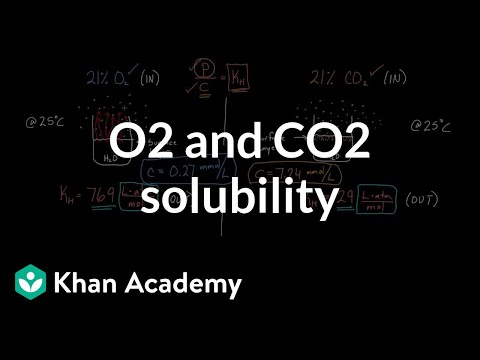

In [3]:
#@title Solubility of gases in water
#@markdown This video gives an intriduction to behavour of gases as function of pressure and temperature
from IPython.display import YouTubeVideo
YouTubeVideo('OCD4Dr3kmmA', width=600, height=400)

# Calcultion of solubility of gases in pure water

In the following example we calculate gas solubility in pure water as function of pressure and temperature

Text(0, 0.5, 'mole fraction [mol/kg water]')

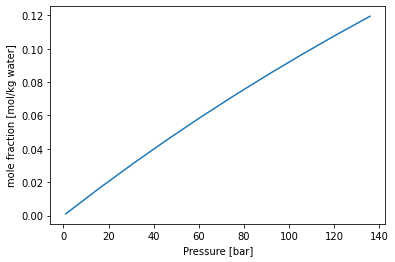

In [34]:
componentName = "oxygen" #@param ["methane", "ethane", "propane", "CO2", "nitrogen", "oxygen"]
temperature = 45.0   #@param {type:"number"}
minPressure = 1.0  #@param {type:"number"}
maxPressure = 150.0  #@param {type:"number"}
eosname = "cpa" #@param ["srk", "pr", "cpa"]
R = 8.314 # J/mol/K

# Creating a fluid in neqsim
fluid1 = fluid(eosname) #create a fluid using the SRK-EoS
fluid1.addComponent(componentName, 1.0) #adding 1 mole to the fluid
fluid1.addComponent("water", 1.0) #adding 1 mole to the fluid
fluid1.init(0);
fluid1.autoSelectMixingRule();

def gassol(pressure, temperature):
    fluid1.setPressure(pressure)
    fluid1.setTemperature(temperature+273.15)
    TPflash(fluid1)
    return fluid1.getPhase('aqueous').getComponent(componentName).getNumberOfMolesInPhase()/(fluid1.getPhase('aqueous').getComponent("water").getNumberOfMolesInPhase()*fluid1.getPhase('aqueous').getComponent("water").getMolarMass())

pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/10.0)+1.0)
gassolubuility = [gassol(P,temperature) for P in pressure]

plt.plot(pressure, gassolubuility)
plt.xlabel('Pressure [bar]')
plt.ylabel('mole fraction [mol/kg water]')

Text(0, 0.5, 'mole fraction [mg/kg water]')

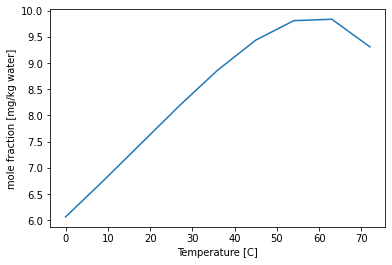

In [39]:
def gassol(pressure, temperature):
    fluid1.setPressure(pressure)
    fluid1.setTemperature(temperature+273.15)
    TPflash(fluid1)
    return fluid1.getComponent(componentName).getMolarMass()*fluid1.getPhase('aqueous').getComponent(componentName).getNumberOfMolesInPhase()/(fluid1.getPhase('aqueous').getComponent("water").getNumberOfMolesInPhase()*fluid1.getPhase('aqueous').getComponent("water").getMolarMass())*1e6

#fluid1.setMixingRule(2) # use classical mixing rule with one kij
#fluid1.getPhase(0).getMixingRule().setBinaryInteractionParameter(0,1,0.42)
#fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameter(0,1,0.42)

minTemperature = 0.0   #@param {type:"number"}
maxTemperature = 80.0  #@param {type:"number"}
pressure = 1.01325  #@param {type:"number"}

temperature = np.arange(minTemperature, maxTemperature, int((maxTemperature-minTemperature)/10.0)+1.0)
gassolubuility = [gassol(pressure, T) for T in temperature]

plt.plot(temperature, gassolubuility)
plt.xlabel('Temperature [C]')
plt.ylabel('mole fraction [mg/kg water]')

In [21]:
printFrame(fluid1)

| 0                  | 1           | 2                    | 3                    | 4   | 5   | 6               |
|:-------------------|:------------|:---------------------|:---------------------|:----|:----|:----------------|
|                    | total       | gas                  | aqueous              |     |     |                 |
| oxygen             | 5E-1        | 6.64594E-1           | 1.04946E-5           |     |     | [mole fraction] |
| water              | 5E-1        | 3.35406E-1           | 9.9999E-1            |     |     | [mole fraction] |
|                    |             |                      |                      |     |     |                 |
| Density            |             | 9.69747E-1           | 9.79406E2            |     |     | [kg/m^3]        |
| PhaseFraction      |             | 7.52335E-1           | 2.47665E-1           |     |     | [mole fraction] |
| MolarMass          | 2.5007E1    | 2.73087E1            | 1.80151E1            |     |     | [

# Calcultion of solubility of gases in salt water

In the following example we calculate gas solubility in pure water as function of pressure and temperature. Sea water will contain salts in various amounts.

Text(0, 0.5, 'mole fraction [mol/kg water]')

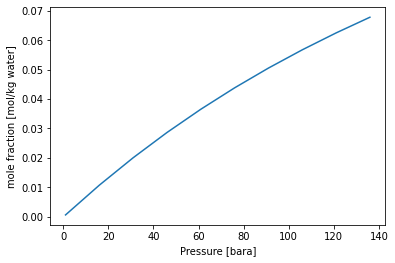

In [5]:
temperature = 45.0   #@param {type:"number"}
minPressure = 1.0  #@param {type:"number"}
maxPressure = 150.0  #@param {type:"number"}
componentName = "methane" #@param ["methane", "ethane", "propane", "CO2", "nitrogen"]
ion1 = "Na+" #@param ["Na+", "Ca++"]
grperkgIon1 = 10.0 #@param {type:"number"}
ion2 = "Cl-" #@param ["Cl-", "CO3--"]
grperkgIon2 = 10.0 #@param {type:"number"}
eosname = "Electrolyte-CPA-EoS" #@param ["Electrolyte-CPA-EoS","Electrolyte-ScRK-EoS"]
R = 8.314 # J/mol/K

# Creating a fluid in neqsim
fluid1 = fluid(eosname) #create a fluid using the SRK-EoS
fluid1.addComponent(componentName, 1.0, 'kg/sec') #adding 100 mole to the fluid
fluid1.addComponent("water", 1.0, 'kg/sec') #adding 1 mole to the fluid
fluid1.addComponent(ion1, grperkgIon1/1000.0, 'kg/sec') #adding 1 mole to the fluiuidd
fluid1.addComponent(ion2, grperkgIon2/1000.0, 'kg/sec') #adding 1 mole to the fl
fluid1.autoSelectMixingRule();
#fluid1.setMultiPhaseCheck(True)

def gassol(pressure, temperature):
    fluid1.setPressure(pressure)
    fluid1.setTemperature(temperature+273.15)
    TPflash(fluid1)
    return fluid1.getPhase('aqueous').getComponent(componentName).getNumberOfMolesInPhase()/(fluid1.getPhase('aqueous').getComponent("water").getNumberOfMolesInPhase()*fluid1.getPhase('aqueous').getComponent("water").getMolarMass())

pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/10.0)+1.0)
gassolubuility = [gassol(P,temperature) for P in pressure]

plt.plot(pressure, gassolubuility)
plt.xlabel('Pressure [bara]')
plt.ylabel('mole fraction [mol/kg water]')

# Calculation of Henrys Constant of gases in solvents


In [6]:
temperature = 25.0   #@param {type:"number"}
pressure = 1.0  #@param {type:"number"}

# Creating a fluid in neqsim
fluid1 = fluid("Electrolyte-CPA-EoS")
fluid1.addComponent("CO2", 11.0, "kg/sec") 
fluid1.addComponent("MEG", 0.5, "kg/sec")
fluid1.addComponent("MDEA", 100.0, "kg/sec")

fluid1.setMixingRule(10)
fluid1.setMultiPhaseCheck(True)
fluid1.setTemperature(temperature, "C")
fluid1.setPressure(pressure, "bara")

TPflash(fluid1)

print("Henrys constant CO2 ", fluid1.getPhase("gas").getComponent("CO2").getx()*pressure/fluid1.getPhase("aqueous").getComponent("CO2").getx(), "bar")

printFrame(fluid1)

Henrys constant CO2  1111.5060561142752 bar
| 0                  | 1          | 2                           | 3                           | 4   | 5   | 6               |
|:-------------------|:-----------|:----------------------------|:----------------------------|:----|:----|:----------------|
|                    | total      | gas                         | aqueous                     |     |     |                 |
| CO2                | 2.27804E-1 | 9.9999E-1                   | 8.99671E-4                  |     |     | [mole fraction] |
| MEG                | 7.34202E-3 | 1.94167E-6                  | 9.49889E-3                  |     |     | [mole fraction] |
| MDEA               | 7.64854E-1 | 8.14394E-6                  | 9.89601E-1                  |     |     | [mole fraction] |
|                    |            |                             |                             |     |     |                 |
| Density            |            | 1.7842E0                    | 1.02035E